In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from MHW_daily_calcs import *

In [26]:
climyrs=[1993,2023]
windowhalfwid=10
smoothmethod='tri'
jj=60
delt=5
iy1,ix1=(55,200)
iy2,ix2=(1,200)

### look at climatologies

In [22]:
cIndiv=xr.open_dataset(fnameOISSTDailyClim(climyrs[0],climyrs[-1]))
cSmooth=xr.open_dataset(fnameOISSTDailyClimSmooth(climyrs[0],climyrs[-1],smoothmethod,windowhalfwid))

In [23]:
cIndiv

<xarray.Dataset> Size: 189MB
Dimensions:  (yearday: 365, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * yearday  (yearday) int64 3kB 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Data variables:
    sst      (yearday, lat, lon) float64 189MB ...

(0.5, 366.5)

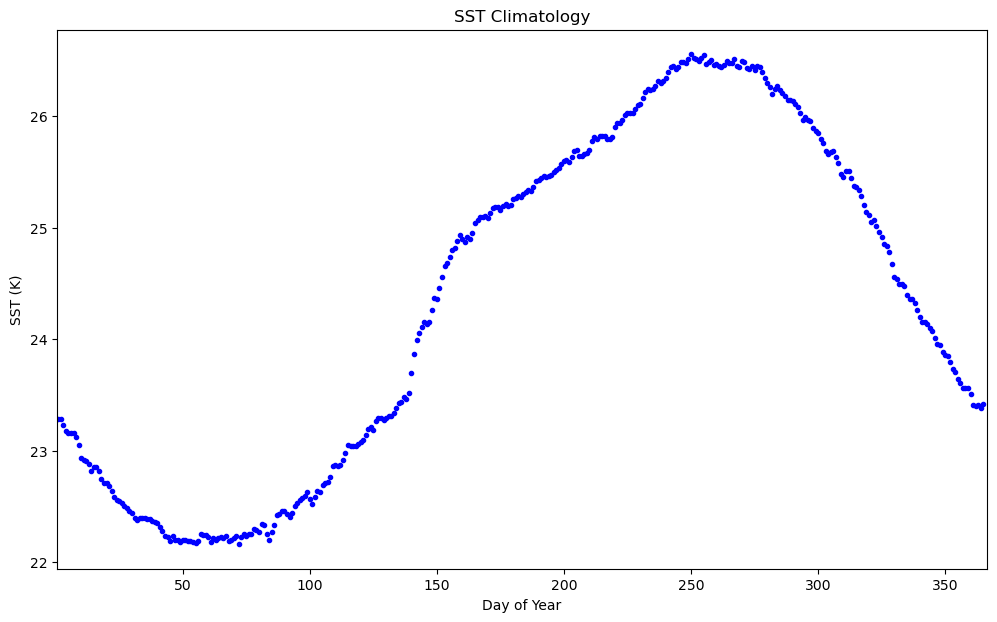

In [28]:
#clim only
fig,ax=plt.subplots(1,1,figsize=(12,7))
t=np.arange(1,366)
plt.plot(t,cIndiv.sst.isel(lat=jj+iy1,lon=ix1).values,'b.')
ax.set_title('SST Climatology')
ax.set_xlabel('Day of Year')
ax.set_ylabel('SST (K)')
ax.set_xlim(.5,366.5)

(0.5, 366.5)

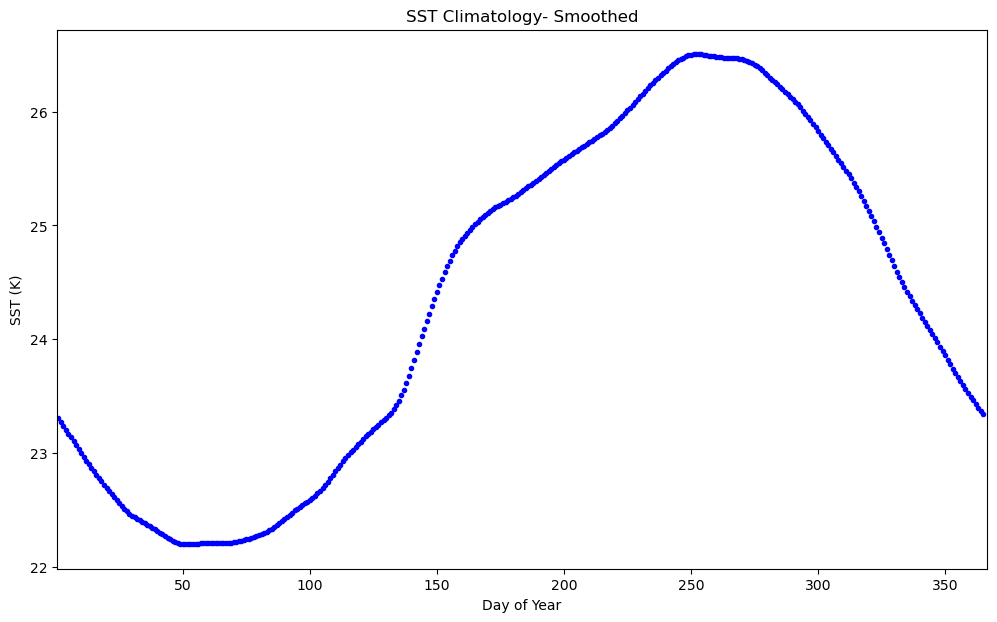

In [29]:
#clim only
fig,ax=plt.subplots(1,1,figsize=(12,7))
t=np.arange(1,366)
plt.plot(t,cSmooth.sst.isel(lat=jj+iy1,lon=ix1).values,'b.')
ax.set_title('SST Climatology- Smoothed')
ax.set_xlabel('Day of Year')
ax.set_ylabel('SST (K)')
ax.set_xlim(.5,366.5)

In [3]:
flist=[fnameOISSTAnom(yrlims, climyrs, jj, True, smoothmethod, windowhalfwid) for yrlims in ylimlistobs]
flist

['/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily/OISST/oisst_anom_ClimStri10_C1993_2023-avhrr-v02r01.regridded1x1g2.daily.1991_2000_j60.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily/OISST/oisst_anom_ClimStri10_C1993_2023-avhrr-v02r01.regridded1x1g2.daily.2001_2010_j60.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily/OISST/oisst_anom_ClimStri10_C1993_2023-avhrr-v02r01.regridded1x1g2.daily.2011_2020_j60.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily/OISST/oisst_anom_ClimStri10_C1993_2023-avhrr-v02r01.regridded1x1g2.daily.2021_2024_j60.nc']

In [4]:

fanom=xr.open_mfdataset(flist,decode_times=False,parallel=True)

In [5]:
fanomD=xr.open_mfdataset([fnameOISSTAnomDetr([ylimlistobs[0][0],ylimlistobs[-1][-1]],climyrs, jj, True, smoothmethod, windowhalfwid),])

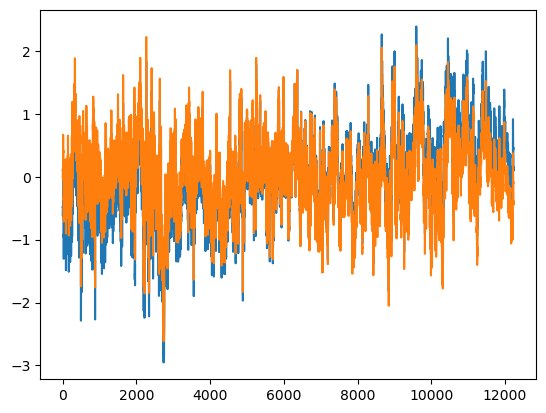

In [6]:
plt.plot(fanom.sst_an[:,iy1,ix1])
plt.plot(fanomD.sst_an[:,iy1,ix1])

In [8]:
fanom.close()
fanomD.close()

In [9]:
fqout = fnameOISSTQTile(climyrs, jj, qtile, smoothClim=True, meth=smoothmethod, win=windowhalfwid,detr=True,delt=delt)

In [10]:
fq=xr.open_dataset(fqout)
fq

<xarray.Dataset> Size: 126MB
Dimensions:  (yd: 366, lat: 60, lon: 360)
Coordinates:
  * lat      (lat) float32 240B -29.5 -28.5 -27.5 -26.5 ... 26.5 27.5 28.5 29.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * yd       (yd) int64 3kB 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365 366
Data variables:
    qt1      (yd, lat, lon) float64 63MB ...
    qt2      (yd, lat, lon) float64 63MB ...

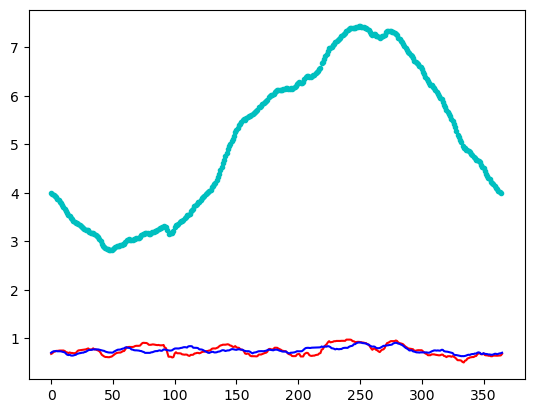

In [31]:
plt.plot(fq.qt1[:,iy1,ix1],'r-')
plt.plot(fq.qt2[:,iy1,ix1],'b-')
plt.plot(cSmooth.sst.isel(lat=jj+iy1,lon=ix1).values+fq.qt1[:-1,iy1,ix1]-20,'c.')

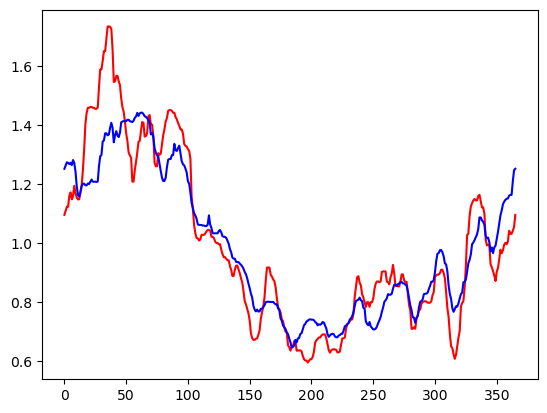

In [15]:
plt.plot(fq.qt1[:,iy2,ix2],'r-')
plt.plot(fq.qt2[:,iy2,ix2],'b-')

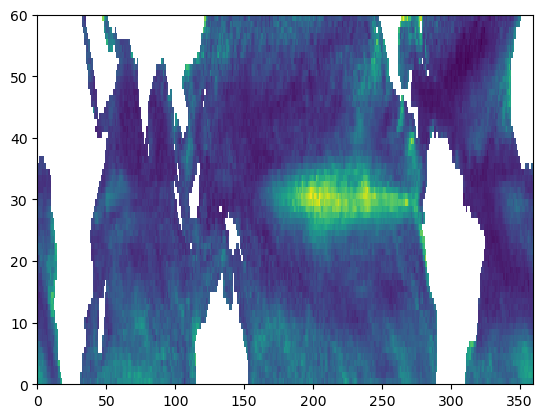

In [14]:
plt.pcolormesh(fq.qt1[0,:,:])

In [17]:
f3=xr.open_dataset(fnameCanESMAnomDetrQtile(workdir, climyrs[0], climyrs[-1], 5, jj, qtile, smoothClim=True,smoothTrend=True,
                                            meth=smoothmethod,win=windowhalfwid,delt=delt))

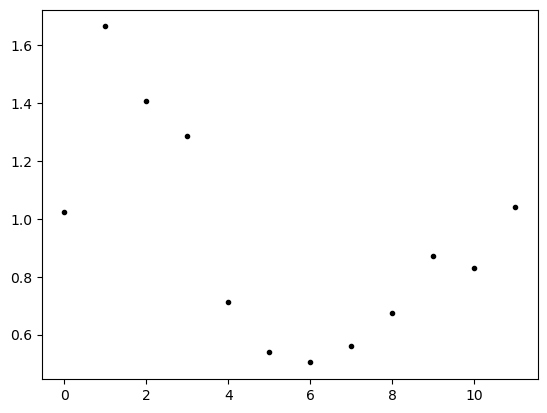

In [21]:
plt.plot(f3.qt1[:,1,200],'k.')